       FIPS  Year         GDP
count 19056 19056       19056
mean  30311  2020    89749340
std   15456     2   793553378
min    1001  2017           0
25%   18158  2018     1617423
50%   29152  2020     4460925
75%   45044  2021    13960971
max   98000  2022 22200255909


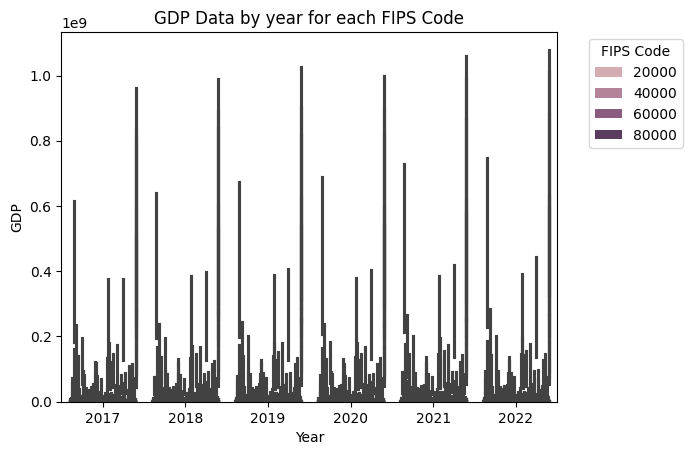

In [96]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.0f}".format

# Replace 'your_file.pkl' with the path to your pickle file
with open("../data/raw/gdp.pkl", "rb") as file:
    data = pickle.load(file)

# print(data.head())

# data.plot(kind='line')
# plt.show()

keys = data.keys()
# values = data.values()
# X=FIPS, Y=UNITS
fips_gdp_data = data[["FIPS", "2017", "2018", "2019", "2020", "2021", "2022"]]
filtered_data = fips_gdp_data.sort_values(by=['FIPS'])

melted_data = pd.melt(data, id_vars=['FIPS'], value_vars=['2017', '2018', '2019', '2020', '2021', '2022'],
                      var_name='Year', value_name='GDP')
melted_data['Year'] = melted_data['Year'].astype(int)
melted_data['GDP'] = melted_data['GDP'].astype(float)

# TODO: 0 Values für GDP raus filtern
# TODO: Gruppieren nur nach Jahr (der Hue gruppiert nach FIPS)
# TODO: Daten normalisieren und im barplot nochmal anzeigen evtl. boxplot

melted_data = melted_data.loc[melted_data["FIPS"] != 0]
melted_data = melted_data.loc[melted_data["FIPS"] != 1000]
grouped_data = melted_data.groupby(["FIPS", "Year"], as_index=False).sum()
print(grouped_data.describe())

sns.barplot(data=melted_data, x='Year', y='GDP', hue='FIPS')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Data by year for each FIPS Code')
plt.legend(title='FIPS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()